#### Библиотеки, данные, функция.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import lsqr
from scipy.stats import norm, t
from scipy.optimize import curve_fit

# Задание массива x
x = np.arange(1, 8, 0.1)
print(x.size)

# Вычисление y
y = 3 * np.sin(x) + 0.5 * x**2 + 8 * np.exp(-0.5 * x)
# y = 0.007*x**4 - 0.003*x**3 + 0.005 * x**2 -0.006*x

70


#### 1. Апроксимация линейной функцией.

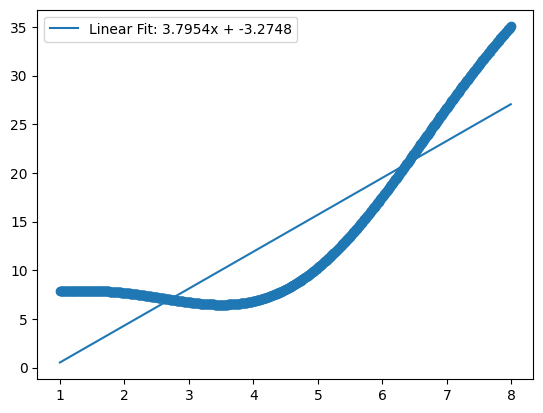

f1: 13386.619328027935
f1_minus: 13626.567778027944
f1_plus: 13446.606440527918


In [9]:
# Рассеиваем точки
plt.scatter(x, y)

# Подготовка данных для линейной аппроксимации
p1 = np.polyfit(x, y, 1)

# Построение линейной аппроксимации
plt.plot(x, p1[0] * x + p1[1], label=f'Linear Fit: {p1[0]:.4f}x + {p1[1]:.4f}')

# Показываем график
plt.legend()
plt.show()

def L1(a, x, y):
    S = 0
    for i in range(len(x)):
        S += (y[i] - (a[0] * x[i] + a[1]))**2
    return S

# Вычисление L1 для текущих параметров
f1 = L1(p1, x, y)

# Вычисление L1 для параметров с изменением
f1_minus = L1(p1 - 0.1, x, y)
f1_plus = L1(p1 + 0.05, x, y)

print(f'f1: {f1}')
print(f'f1_minus: {f1_minus}')
print(f'f1_plus: {f1_plus}')

#### 2. Апроксимация квадратичной функцией.

f2: 432.0891994379872
f2_minus: 9587.409732769129
f2_plus: 2720.919332770692


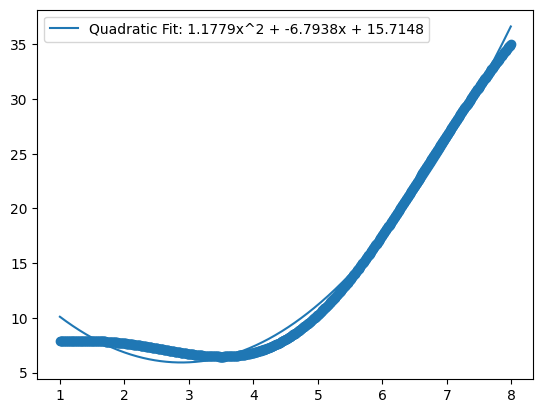

In [10]:
# Подготовка данных для квадратичной аппроксимации
p2 = np.polyfit(x, y, 2)

# Построение квадратичной аппроксимации
plt.scatter(x, y)
plt.plot(x, p2[0] * x**2 + p2[1] * x + p2[2], label=f'Quadratic Fit: {p2[0]:.4f}x^2 + {p2[1]:.4f}x + {p2[2]:.4f}')

def L2(a, x, y):
    S = 0
    for i in range(len(x)):
        S += (y[i] - (a[0] * x[i]**2 + a[1] * x[i] + a[2]))**2
    return S

# Вычисление L2 для текущих параметров
f2 = L2(p2, x, y)

# Вычисление L2 для параметров с изменением
f2_minus = L2(p2 - 0.1, x, y)
f2_plus = L2(p2 + 0.05, x, y)

print(f'f2: {f2}')
print(f'f2_minus: {f2_minus}')
print(f'f2_plus: {f2_plus}')

# Показываем график
plt.legend()
plt.show()

#### 3. Приближение произвольной системой функций.

f3: 4248.401572152245
f3_minus: 153475.12541731546
f3_plus: 41555.08253344311


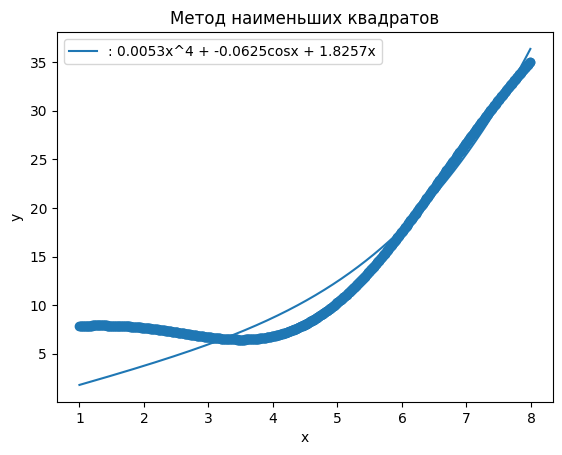

In [11]:
# Создание матрицы X
X = np.column_stack((x**4, np.cos(x), x))

# Решение методом наименьших квадратов
p3 = lsqr(X, y)[0]

# Рассеиваем точки
plt.scatter(x, y)

# Построение графика модели
plt.plot(x, p3[0] * x**4 + p3[1] * np.cos(x) + p3[2] * x, label=f': {p3[0]:.4f}x^4 + {p3[1]:.4f}cosx + {p3[2]:.4f}x')

def L3(a, x, y):
    S = 0
    for i in range(len(x)):
        S += (y[i] - (a[0] * x[i]**4 + a[1] * np.cos(x[i]) + a[2] * x[i]))**2
    return S

# Вычисление L3 для текущих параметров
f3 = L3(p3, x, y)

# Вычисление L3 для параметров с изменением
f3_minus = L3(p3 - 0.01, x, y)
f3_plus = L3(p3 + 0.005, x, y)

print(f'f3: {f3}')
print(f'f3_minus: {f3_minus}')
print(f'f3_plus: {f3_plus}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод наименьших квадратов')
plt.legend()
plt.show()

#### 4. Приближение исходной системой функций

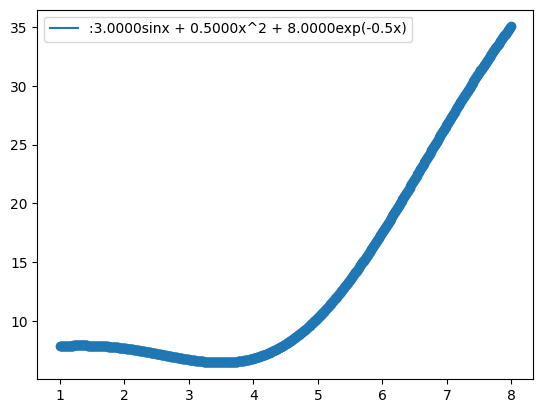

In [12]:
# Создание матрицы X1
X1 = np.column_stack((np.sin(x), x**2, np.exp(-0.5*x)))

# Решение методом наименьших квадратов
p4 = lsqr(X1, y)[0]
# Рассеиваем точки
plt.scatter(x, y)

# Построение графика модели
line, = plt.plot(x, p4[0]*np.sin(x) + p4[1]*(x**2) + p4[2]*np.exp(-0.5*x))
line.set_label(f':{p4[0]:.4f}sinx + {p4[1]:.4f}x^2 + {p4[2]:.4f}exp(-0.5x)')
plt.legend()
plt.show()

#### 5. Оценка погрешности.

In [13]:
x_new = x + np.random.normal(0, 0.1, x.size)
y_new = y + np.random.normal(0, 0.1, x.size)
x_new = x_new.reshape(-1, 1)
X = np.concatenate((np.ones((x_new.size, 1)), x_new), axis=1)
a = np.linalg.inv(X.T @ X) @ X.T @ y_new
print(a)
c = np.linalg.inv(X.T @ X)
n = x_new.size
print(n)
int_1_left = a - norm.ppf(0.95, 0, 1) * np.sqrt(c, dtype=np.complex_) / np.sqrt(n)
int_1_right = a + norm.ppf(0.95, 0, 1) * np.sqrt(c, dtype=np.complex_) / np.sqrt(n)
int_2_left = a - t.ppf(0.95, n - 2) * np.sqrt(c, dtype=np.complex_) / np.sqrt(n)
int_2_right = a + t.ppf(0.95, n - 2) * np.sqrt(c, dtype=np.complex_) / np.sqrt(n)
print(c)
print(int_1_left)
print(int_1_right)
print(int_2_left)
print(int_2_right)

[-3.27532045  3.79568144]
700
[[ 0.00851391 -0.00157575]
 [-0.00157575  0.00035044]]
[[-3.28105689+0.j          3.79568144-0.00246787j]
 [-3.27532045-0.00246787j  3.79451762+0.j        ]]
[[-3.269584  +0.j          3.79568144+0.00246787j]
 [-3.27532045+0.00246787j  3.79684526+0.j        ]]
[[-3.28106451+0.j          3.79568144-0.00247115j]
 [-3.27532045-0.00247115j  3.79451608+0.j        ]]
[[-3.26957638+0.j          3.79568144+0.00247115j]
 [-3.27532045+0.00247115j  3.79684681+0.j        ]]


6. Ортогональные системы функций.

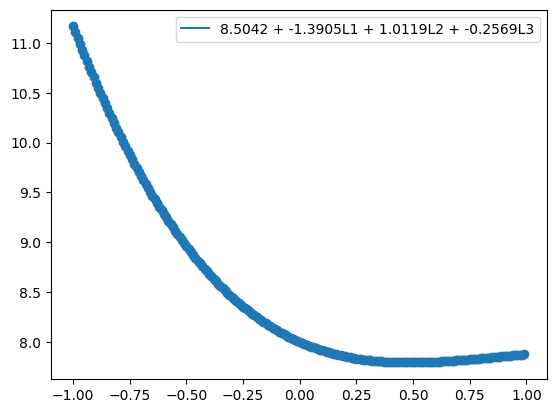

In [66]:
import numpy as np
from numpy.polynomial import legendre
from scipy.sparse.linalg import lsqr
import matplotlib.pyplot as plt
x = np.arange(-1, 1, 0.01)

y = 3 * np.sin(x) + 0.5 * x**2 + 8 * np.exp(-0.5 * x)

p = legendre.legfit(x, y, 3)
plt.scatter(x, y)

# Построение графика модели
# Построение графика аппроксимации
line, = plt.plot(x, legendre.legval(x, p))
line.set_label(f'{p[0]:.4f} + {p[1]:.4f}L1 + {p[2]:.4f}L2 + {p[3]:.4f}L3')

plt.legend()
plt.show()

In [74]:
x_new = x + np.random.normal(0, 0.1, x.size)
y_new = y + np.random.normal(0, 0.1, x.size)

# Создание матрицы X на базе полиномов Лежандра
degree = 2
legendre_basis = [legendre.Legendre.basis(i, domain=[-1, 1]) for i in range(degree + 1)]
X_legendre = np.column_stack([basis(x_new) for basis in legendre_basis])

# Добавление столбца с единицами для свободного члена
X_legendre = np.concatenate((np.ones((x_new.size, 1)), X_legendre), axis=1)

[[200.         200.          -1.04014578   3.35175344]
 [200.         200.          -1.04014578   3.35175344]
 [ -1.04014578  -1.04014578  68.90116896   0.32992628]
 [  3.35175344   3.35175344   0.32992628  44.2955612 ]]
